<a href="https://colab.research.google.com/github/as-bestinclass/anand4MahiGaming/blob/main/Scenario_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Load Data

In [13]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#all caps cause i would rather create a new dataframe for analysis and have original dataframe constant
FEATUREPURCHASEMETRICS_DF = pd.read_csv('/content/Scenario I.csv')

In [3]:
FEATUREPURCHASEMETRICS_DF.head(10)

,timestamp,FeatureBuyChoice,Purchased Feature count
0,6/2/2022 0:00,purchase4,1118
1,6/2/2022 0:00,purchase5,304
2,6/2/2022 0:00,purchase6,244
3,6/3/2022 0:00,purchase4,4010
4,6/3/2022 0:00,purchase5,1032
5,6/3/2022 0:00,purchase6,1065
6,6/4/2022 0:00,purchase4,3300
7,6/4/2022 0:00,purchase5,757
8,6/4/2022 0:00,purchase6,1017
9,6/5/2022 0:00,purchase4,3013


##Questions

  A recent game implemented a Bonus Buy option (see image below).  The player can purchase any of the bonuses (purchase4, purchase 5 or purchase 6).  
  The data gathered thru telemetry is in a table below.


1.   **Timestamp** indicates when the Bonus Buy was selected
2.   **FeatureBuyChoice** indicates what Bonus buy option was selected
3.   **Purchased Feature count** indicates what Bonus buy option was selected
        Purchased Feature count indicates how many times the Bonus Buy option (Feature) was selected in the time period (timestamp).


### 1.   **Question 1**: What is the data telling us?  Provide a visualization that best represents the data collected.  Present conclusions.  
### 2.   **Question 2**: What other fields would you request to be added to get additional insights?

#Data Cleanup

##Data Type

In [4]:
FEATUREPURCHASEMETRICS_DF.dtypes

timestamp                  object
FeatureBuyChoice           object
Purchased Feature count     int64
dtype: object

##timestamp (optional)

In [ ]:
#lets make sure the timestamp column is in correct datatype

df['timestamp'] = pd.to_datetime(df['timestamp'], format='%m/%d/%Y %H:%M')

In [ ]:
df['timestamp']

0    2022-06-02
1    2022-06-02
2    2022-06-02
3    2022-06-03
4    2022-06-03
5    2022-06-03
6    2022-06-04
7    2022-06-04
8    2022-06-04
9    2022-06-05
10   2022-06-05
11   2022-06-05
12   2022-06-06
13   2022-06-06
14   2022-06-06
15   2022-06-07
16   2022-06-07
17   2022-06-07
18   2022-06-08
19   2022-06-08
20   2022-06-08
21   2022-06-09
22   2022-06-09
23   2022-06-09
Name: timestamp, dtype: datetime64[ns]

##FeatureBuyChoice(optional)

In [ ]:
#categorical values are encoded using LabelEncoder

encoder = LabelEncoder()
df['FeatureBuyChoice']=encoder.fit_transform(df['FeatureBuyChoice'])

In [ ]:
df['FeatureBuyChoice']

0     0
1     1
2     2
3     0
4     1
5     2
6     0
7     1
8     2
9     0
10    1
11    2
12    0
13    1
14    2
15    0
16    1
17    2
18    0
19    1
20    2
21    0
22    1
23    2
Name: FeatureBuyChoice, dtype: int64

##Purchased Feature count (optional)

In [ ]:
#lets scale the quantitative data

scaler = StandardScaler()
df['Purchased Feature count'] = scaler.fit_transform(df['Purchased Feature count'].values.reshape(-1,1))
# we reshaped the column because we must pass 2D array, beacuse scaler only accepts 2d array

In [ ]:
df['Purchased Feature count']

0    -0.416605
1    -1.119863
2    -1.171700
3     2.081946
4    -0.490905
5    -0.462395
6     1.468539
7    -0.728492
8    -0.503864
9     1.220585
10   -0.781193
11   -0.693934
12    1.304388
13   -0.677519
14   -0.642097
15    1.597268
16   -0.513368
17   -0.391551
18    1.751916
19   -0.520279
20   -0.093487
21    1.075441
22   -0.699118
23   -0.593715
Name: Purchased Feature count, dtype: float64

#Data Engineering

In [ ]:
#data generation
#thinking outside of box, analyzing the geometric position of purchase4, purchase5 and purchase6 in respective to the cancel button
#hypothesis and proof

##Cost Table

In [5]:
# Create a dictionary to hold the data
CostDictionary = {
    'Purchase': ['purchase4', 'purchase5', 'purchase6'],
    'Cost': [150, 240, 300]
}

# Create a DataFrame from the dictionary
CostDataframe = pd.DataFrame(CostDictionary)

# Display the DataFrame
print(CostDataframe)

    Purchase  Cost
0  purchase4   150
1  purchase5   240
2  purchase6   300


##data split

In [8]:
# Calculate the total sum of count by each category
newTable = FEATUREPURCHASEMETRICS_DF.groupby('FeatureBuyChoice')['Purchased Feature count'].sum().reset_index()

In [9]:
newTable

,FeatureBuyChoice,Purchased Feature count
0,purchase4,24473
1,purchase5,6400
2,purchase6,7532


In [ ]:
# Filter the DataFrame to include only rows where FeatureBuyChoice is 'purchase4', 'purchase5' and 'purchase6'
purchase4_df = FEATUREPURCHASEMETRICS_DF[FEATUREPURCHASEMETRICS_DF['FeatureBuyChoice'] == 'purchase4']
purchase5_df = FEATUREPURCHASEMETRICS_DF[FEATUREPURCHASEMETRICS_DF['FeatureBuyChoice'] == 'purchase5']
purchase6_df = FEATUREPURCHASEMETRICS_DF[FEATUREPURCHASEMETRICS_DF['FeatureBuyChoice'] == 'purchase6']

In [ ]:
purchase4_df

,timestamp,FeatureBuyChoice,Purchased Feature count
0,6/2/2022 0:00,purchase4,1118
3,6/3/2022 0:00,purchase4,4010
6,6/4/2022 0:00,purchase4,3300
9,6/5/2022 0:00,purchase4,3013
12,6/6/2022 0:00,purchase4,3110
15,6/7/2022 0:00,purchase4,3449
18,6/8/2022 0:00,purchase4,3628
21,6/9/2022 0:00,purchase4,2845


#Visualization

In [ ]:
CostDataframe

In [ ]:
FEATUREPURCHASEMETRICS_DF

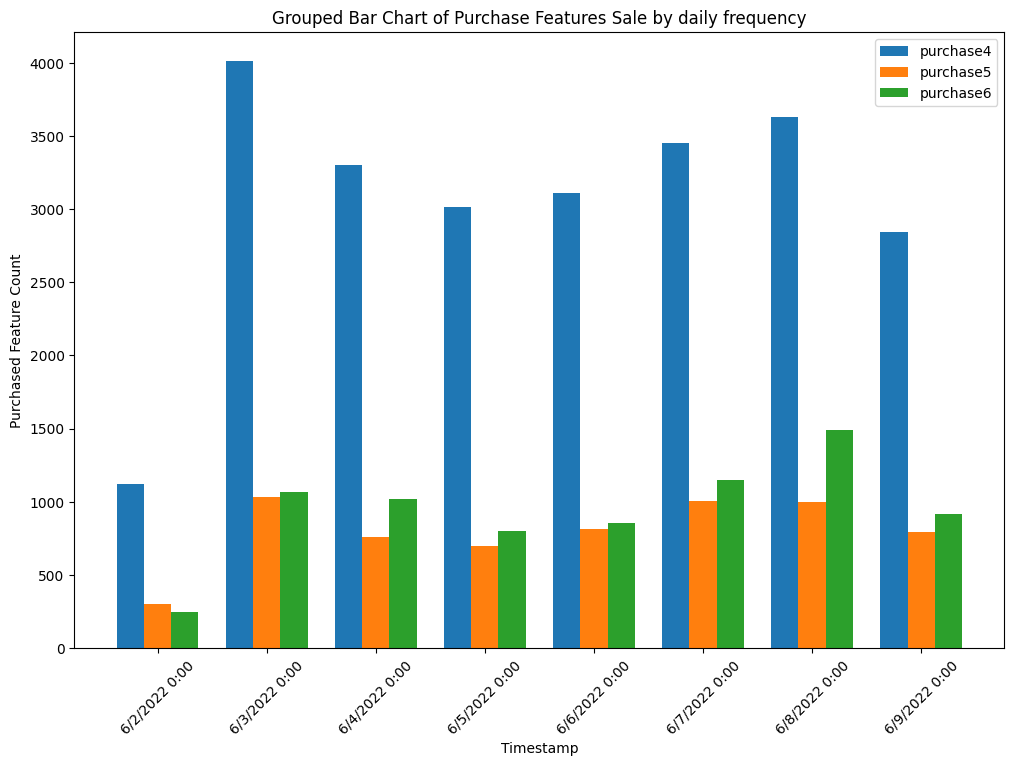

In [16]:
# Create the DataFrame
df = FEATUREPURCHASEMETRICS_DF

# Pivot the DataFrame to get the data in the format suitable for grouped bar chart
pivot_df = df.pivot(index='timestamp', columns='FeatureBuyChoice', values='Purchased Feature count')

# Create the grouped bar chart
bar_width = 0.25  # Narrower bars for more spacing
index = np.arange(len(pivot_df.index))

# Increase the figure size for a bigger chart
fig, ax = plt.subplots(figsize=(12, 8))

bar1 = ax.bar(index, pivot_df['purchase4'], bar_width, label='purchase4')
bar2 = ax.bar(index + bar_width, pivot_df['purchase5'], bar_width, label='purchase5')
bar3 = ax.bar(index + 2*bar_width, pivot_df['purchase6'], bar_width, label='purchase6')

# Add labels and title
ax.set_xlabel('Timestamp')
ax.set_ylabel('Purchased Feature Count')
ax.set_title('Grouped Bar Chart of Purchase Features Sale by daily frequency')

# Adjust x-ticks for better visibility and spacing
ax.set_xticks(index + bar_width)
ax.set_xticklabels(pivot_df.index, rotation=45)  # Tilt x-labels for better visibility

ax.legend()

# Show the plot
plt.show()

<ipython-input-19-75ad48bd1e82>:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(pivot_df.index, rotation=45)  # Tilt x-labels for better visibility


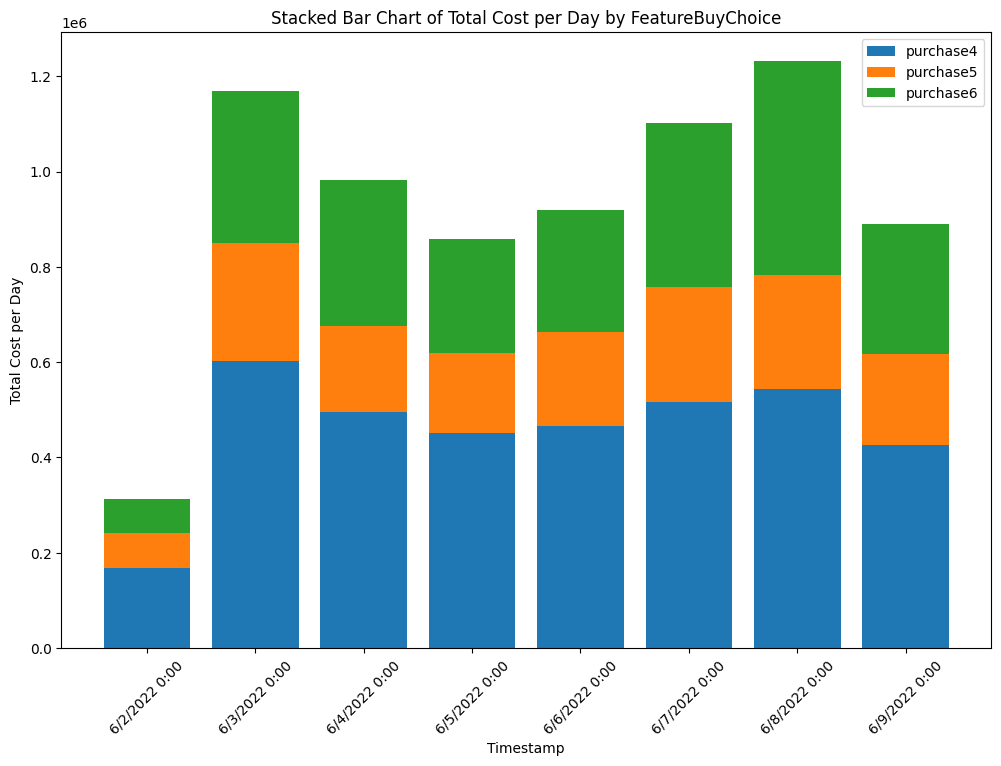

In [19]:
# Create the DataFrame for purchase counts
df_counts = FEATUREPURCHASEMETRICS_DF

# Create the DataFrame for costs
df_costs = CostDataframe

# Merge the two DataFrames
merged_df = pd.merge(df_counts, df_costs, left_on='FeatureBuyChoice', right_on='Purchase')

# Calculate the total cost for each purchase
merged_df['Total Cost'] = merged_df['Purchased Feature count'] * merged_df['Cost']

# Group by timestamp and sum the total costs
grouped_df = merged_df.groupby('timestamp')['Total Cost'].sum().reset_index()

# Pivot the DataFrame for stacked bar chart
pivot_df = merged_df.pivot(index='timestamp', columns='FeatureBuyChoice', values='Total Cost')

# Increase the figure size for a bigger chart
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the total costs as stacked bars
ax.bar(grouped_df['timestamp'], pivot_df['purchase4'], label='purchase4')
ax.bar(grouped_df['timestamp'], pivot_df['purchase5'], bottom=pivot_df['purchase4'], label='purchase5')
ax.bar(grouped_df['timestamp'], pivot_df['purchase6'], bottom=pivot_df['purchase4'] + pivot_df['purchase5'], label='purchase6')

# Add labels and title
ax.set_xlabel('Timestamp')
ax.set_ylabel('Total Cost per Day')
ax.set_title('Stacked Bar Chart of Total Cost per Day by FeatureBuyChoice')
ax.legend()

# Adjust x-ticks for better visibility and spacing
ax.set_xticklabels(pivot_df.index, rotation=45)  # Tilt x-labels for better visibility

# Show the plot
plt.show()

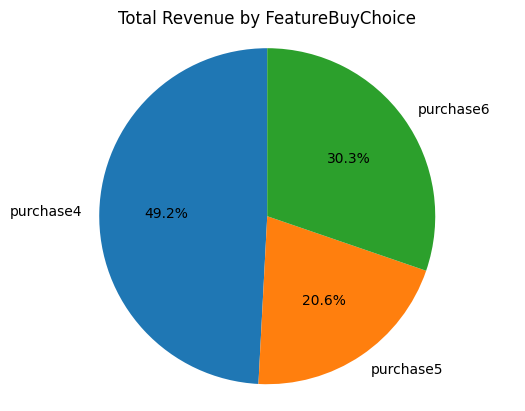

In [21]:
# Merge the two DataFrames to calculate total revenue
merged_df = pd.merge(FEATUREPURCHASEMETRICS_DF, CostDataframe, left_on='FeatureBuyChoice', right_on='Purchase')
merged_df['Total Revenue'] = merged_df['Purchased Feature count'] * merged_df['Cost']

# Calculate total revenue for each category
total_revenue_by_category = merged_df.groupby('FeatureBuyChoice')['Total Revenue'].sum()

# Create the pie chart
fig, ax = plt.subplots()

ax.pie(total_revenue_by_category, labels=total_revenue_by_category.index, autopct='%1.1f%%', startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Add title
ax.set_title('Total Revenue by FeatureBuyChoice')

# Show the plot
plt.show()